In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import jieba as jb
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#rom data_utils import *
import jieba
import matplotlib.pyplot as plt


# 讀取轉換完之file 

In [ ]:
df2 = pd.read_csv(r'C:\Users\Cai\ML04\train_ml.csv')
df1= pd.read_csv(r'C:\Users\Cai\ML04\train.csv')
#df=df[['cat','review']]

df2=df2['0']
df1=df1['label']

# 使用jieba對中文文黨斷詞

In [2]:
# bigram分词
segment_bigram = lambda text: " ".join([word + text[idx + 1] for idx, word in enumerate(text) if idx < len(text) - 1])
# 结巴中文分词
segment_jieba = lambda text: " ".join(jieba.cut(text))

'''
    1、加载语料
'''
corpus = []
#with open("train_ml.csv", "r", encoding="utf-8") as f:
for line in df2:
    # 去掉标点符号
    corpus.append(segment_jieba(line.strip()))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Cai\AppData\Local\Temp\jieba.cache
Loading model cost 0.637 seconds.
Prefix dict has been built successfully.


In [3]:
df=pd.DataFrame()
df['cat_id']=df1
df['review']=corpus
df['cat']=df1
df

,cat_id,review,cat
0,7,e10 鋁圈 單後紅 夫人 英文 鳳姐 你 今兒 什麼 樣鳳姐 兒到 太太 只管 請 回去 ...,7
1,5,取締 酒後駕 車勤務 進行 呼氣質 酒測 時會議 警政署 訂 單取 締酒 後 駕車 作業 程...,5
2,4,致伸 縮喇家 在 五台山 跟師 父子 增長 老學會 說 因緣 經驗 你 可將 女兒 長 了 ...,4
3,1,寄 之 盲校 被叫 姊親 自去 接 又 叫 我 先 回公館裡 去 知道 我 就 先回去 了 ...,1
4,3,關於難 辭 其者 自身 也 為 孫權 所 砂石 半年 的 攻防 戰中數 中景 不 派兵 網雲...,3
...,...,...,...
924,3,10.28 天安 門 事件 2013 年 10 月 28 日 12 10 05 分 ...,3
925,3,不同 地方 對滅 火器 的 分類 稍 有 不同 但 基本上 都 是 按照 火 的 種類 分為...,3
926,2,董卓 時常 使 人 探 聽 是 日 獲得此 詩來 成 董卓 著樂 願望 作師 沙織 有名 1...,2
927,3,台灣 雨量 豐沛 大小 河川 1 部長 度 超過 100 公里 有 7 條一試 分別 是 濁...,3


In [4]:
cat_id_df=pd.DataFrame()
cat_id_df['cat']=df1
cat_id_df['cat_id']=df1

# stopword、remove_punctuation
停用詞、詞根去除

In [5]:

def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line
 
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  
 
#加载停用词
stopwords = stopwordslist(r"C:\Users\Cai\ML04\chineseStopWords.txt")


df['clean_review'] = df['review'].apply(remove_punctuation)
df.sample(10)

,cat_id,review,cat,clean_review
618,1,真是 的 哪裡 做 的 他 找 你曉得 他 到 哪裡 去 了 他 帶 了 銀子 一直 進金 ...,1,真是的哪裡做的他找你曉得他到哪裡去了他帶了銀子一直進金平台的就君上一個大花樣的到元加上一個2...
679,1,還見 的 人 而 你 是 我 自家 親親 人掛 上 了 一個 名字 他 總得 要 分給 你 ...,1,還見的人而你是我自家親親人掛上了一個名字他總得要分給你一點好處還有你書其名下應得的薪水大約出...
518,0,讀書人 的 事能 算 偷 嗎 接連 便是 難 懂 的 話 什麼 君子 固窮 什麼 者 乎 之...,0,讀書人的事能算偷嗎接連便是難懂的話什麼君子固窮什麼者乎之類引得眾人都哄笑起來店內外充滿了快活的空氣
147,2,可破 的 劉備 然後再 打 呂布 徐州 便 可 到手 語是 元素 公升 策改 發兵 攻打 劉...,2,可破的劉備然後再打呂布徐州便可到手語是元素公升策改發兵攻打劉備呂布將人數的大將g0和劉備請只...
896,5,陸委會 主委 張小月 11 號在 年 終記者 會 上集 集 2017 年 工作 重點 時空裂...,5,陸委會主委張小月11號在年終記者會上集集2017年工作重點時空裂出神桌國內外情事研議落實兩岸...
904,5,蒙古 兵役 義務 與 職涯 發展 另外 行政院 核定 至 明年 起開放 辦理 83 年次 以...,5,蒙古兵役義務與職涯發展另外行政院核定至明年起開放辦理83年次以後出生常備役體位役男服研發及產...
117,4,葡萄 王 41 中 的 影子 盾 騎 改念 把 螢子 掏出 來 還有 書信 一封 裡吃 也 ...,4,葡萄王41中的影子盾騎改念把螢子掏出來還有書信一封裡吃也是得幾個字打開書信一看卻是強人給史靜...
750,2,蟑螂 等 聽 說 外地 的 冰來 到 便 先下手 太 50 名 刀斧手 埋伏 在 長 樂 宮...,2,蟑螂等聽說外地的冰來到便先下手太50名刀斧手埋伏在長樂宮佳德門內讓何太后朝和親進攻何太后不知世紀
560,0,好貴外 站 著 熱熱 的 喝 了 休息 一堂 很多 花 英文 便 可 買 一點 鹽 竹筍 或...,0,好貴外站著熱熱的喝了休息一堂很多花英文便可買一點鹽竹筍或者茴香豆坐下酒誤了如果出道時給文那就...
595,4,這天 少華山 的 三個頭 領意 是 諸佛 說華因 現出 3000 觀賞 錢 捉拿 我們 我們...,4,這天少華山的三個頭領意是諸佛說華因現出3000觀賞錢捉拿我們我們要多備些量


In [6]:
id_to_cat = dict(cat_id_df[['cat_id', 'cat']].values)

df['cut_review'] = df['clean_review'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df.head()

,cat_id,review,cat,clean_review,cut_review
0,7,e10 鋁圈 單後紅 夫人 英文 鳳姐 你 今兒 什麼 樣鳳姐 兒到 太太 只管 請 回去 ...,7,e10鋁圈單後紅夫人英文鳳姐你今兒什麼樣鳳姐兒到太太只管請回去我需得先理出一個頭緒來才回去得...,e10 鋁圈 單後紅 夫人 英文 鳳姐 今兒 什麼 樣鳳姐 兒到 太太 只管 請 回去 需得...
1,5,取締 酒後駕 車勤務 進行 呼氣質 酒測 時會議 警政署 訂 單取 締酒 後 駕車 作業 程...,5,取締酒後駕車勤務進行呼氣質酒測時會議警政署訂單取締酒後駕車作業程序規定確認受測者英九結束後食...,取締 酒後駕 車勤務 進行 呼氣質 酒測 時會議 警政署 訂 單取 締酒 後 駕車 作業 程...
2,4,致伸 縮喇家 在 五台山 跟師 父子 增長 老學會 說 因緣 經驗 你 可將 女兒 長 了 ...,4,致伸縮喇家在五台山跟師父子增長老學會說因緣經驗你可將女兒長了我到你女兒房中說那二大王回心轉意...,致伸 縮喇家 五台山 跟師 父子 增長 老學會 說 因緣 經驗 可將 女兒 長 女兒 房中 ...
3,1,寄 之 盲校 被叫 姊親 自去 接 又 叫 我 先 回公館裡 去 知道 我 就 先回去 了 ...,1,寄之盲校被叫姊親自去接又叫我先回公館裡去知道我就先回去了到了下午記之陪著他老太太來了記之夫人...,寄 盲校 被叫 姊親 自去 接 先 回公館裡 知道 先回去 下午 記之陪 著 老太太 來 記...
4,3,關於難 辭 其者 自身 也 為 孫權 所 砂石 半年 的 攻防 戰中數 中景 不 派兵 網雲...,3,關於難辭其者自身也為孫權所砂石半年的攻防戰中數中景不派兵網雲任起不滅認為諸葛亮音關與破壞農中...,關於難 辭 其者 為 孫權 砂石 半年 攻防 戰中數 中景 派兵 網雲任 不滅 認為 諸葛亮...


# tf-idf

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(df.cut_review)
labels = df.cat_id
print(features.shape)
print('-----------------------------')
print(features)

(929, 28601)
-----------------------------
  (0, 9371)	0.1512530629684542
  (0, 7112)	0.1512530629684542
  (0, 24146)	0.1512530629684542
  (0, 18370)	0.1512530629684542
  (0, 7898)	0.1512530629684542
  (0, 27841)	0.1512530629684542
  (0, 801)	0.1512530629684542
  (0, 4646)	0.1512530629684542
  (0, 27537)	0.1512530629684542
  (0, 7901)	0.1512530629684542
  (0, 6719)	0.1512530629684542
  (0, 9293)	0.1512530629684542
  (0, 4707)	0.1512530629684542
  (0, 16146)	0.1512530629684542
  (0, 3448)	0.1512530629684542
  (0, 3483)	0.1512530629684542
  (0, 28397)	0.1512530629684542
  (0, 22346)	0.1512530629684542
  (0, 9377)	0.1512530629684542
  (0, 7758)	0.1512530629684542
  (0, 26810)	0.1512530629684542
  (0, 562)	0.1512530629684542
  (0, 7111)	0.1512530629684542
  (0, 24145)	0.1512530629684542
  (0, 18365)	0.12472222514196227
  :	:
  (928, 3003)	0.16732441077249804
  (928, 14174)	0.16732441077249804
  (928, 26900)	0.16732441077249804
  (928, 6125)	0.16732441077249804
  (928, 2575)	0.1673244107724

In [8]:
cat_to_id = dict(cat_id_df.values)


# print 出 各類別高詞頻詞彙

In [9]:

from sklearn.feature_selection import chi2
import numpy as np
 
N = 2
for cat, cat_id in sorted(cat_to_id.items()):
    features_chi2 = chi2(features, labels == cat_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("# '{}':".format(cat))
    print("  . Most correlated unigrams:\n. {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n . {}".format('\n. '.join(bigrams[-N:])))

# '0':
  . Most correlated unigrams:
. 他們
       . 孔乙己
  . Most correlated bigrams:
 . 中日 作者
. 東西 似乎
# '1':
  . Most correlated unigrams:
. 知道
       . 上海
  . Most correlated bigrams:
 . 因為 未曾
. 一個 金戒指
# '2':
  . Most correlated unigrams:
. 曹操
       . 劉備
  . Most correlated bigrams:
 . 劉備 劉備
. 攻打 徐州
# '3':
  . Most correlated unigrams:
. 事件
       . 台灣
  . Most correlated bigrams:
 . 天安 門廣場
. 天安 事件
# '4':
  . Most correlated unigrams:
. 高球
       . 大王
  . Most correlated bigrams:
 . 小王 太尉
. 一封 書信
# '5':
  . Most correlated unigrams:
. 表示
       . 報導
  . Most correlated bigrams:
 . 時代 力量
. 台北 報導
# '6':
  . Most correlated unigrams:
. 八戒
       . 悟空
  . Most correlated bigrams:
 . 兩個 悟空
. 八戒 沙僧
# '7':
  . Most correlated unigrams:
. 鳳姐
       . 如今
  . Most correlated bigrams:
 . 飲日鏡 一一
. 英建發 飲日鏡


In [10]:
def myPredict(sec):
    format_sec=" ".join([w for w in list(jb.cut(remove_punctuation(sec))) if w not in stopwords])
    pred_cat_id=clf.predict(count_vect.transform([format_sec]))
    return id_to_cat[pred_cat_id[0]]


#  不同分類器去訓練，比較結果

In [133]:
from xgboost.sklearn import XGBClassifier

clfs = XGBClassifier(
        #樹的個數
        n_estimators=100,
        # 如同學習率
        learning_rate= 0.3, 
        # 構建樹的深度，越大越容易過擬合    
        max_depth=20, 
        # 隨機取樣訓練樣本 訓練例項的子取樣比
        subsample=1, 
        # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        gamma=500,
      
        # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        reg_lambda=1,  
        #最大增量步長，我們允許每個樹的權重估計。
        max_delta_step=0,
        # 生成樹時進行的列取樣 
        colsample_bytree=1, 

        # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
        # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
        #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        min_child_weight=1, 

        #隨機種子
        seed=1000 
        
        # L1 正則項引數
#        reg_alpha=0,
        
        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #scale_pos_weight=1,
        
        #多分類的問題 指定學習任務和相應的學習目標
        #objective= 'multi:softmax', 
        
        # 類別數，多分類與 multisoftmax 並用
        #num_class=10,
        
        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#        silent=0 ,
        # cpu 執行緒數 預設最大
#        nthread=4,
    
        #eval_metric= 'auc'
)


In [247]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
 
X_train, X_test, y_train, y_test = train_test_split(df['cut_review'], df['cat_id'], random_state = 0)

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
 
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None).fit(X_train_tfidf, y_train)


In [248]:
#ML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier

params = { 'max_depth': 6, 'objective': 'multi:softmax', 'num_class': 3 }
#---DL
from sklearn import decomposition, ensemble
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm



models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    
    LinearSVC(C=2.0,multi_class ='ovr'),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    clfs,
    svm.SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True,
            shrinking=True,
    tol=0.001, verbose=False),
    
    #(kernel='linear',C=1.5, decision_function_shape = 'ovr'),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    ]




In [249]:
from sklearn.model_selection import cross_val_score

CV = 5

cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []

for model in models:
    
    model_name = model.__class__.__name__
    
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
        
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\Cai\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [250]:
entries

[('RandomForestClassifier', 0, 0.1774193548387097),
 ('RandomForestClassifier', 1, 0.1774193548387097),
 ('RandomForestClassifier', 2, 0.1989247311827957),
 ('RandomForestClassifier', 3, 0.1827956989247312),
 ('RandomForestClassifier', 4, 0.17297297297297298),
 ('LinearSVC', 0, 0.6989247311827957),
 ('LinearSVC', 1, 0.7688172043010753),
 ('LinearSVC', 2, 0.7634408602150538),
 ('LinearSVC', 3, 0.7204301075268817),
 ('LinearSVC', 4, 0.6810810810810811),
 ('MultinomialNB', 0, 0.3709677419354839),
 ('MultinomialNB', 1, 0.3763440860215054),
 ('MultinomialNB', 2, 0.3602150537634409),
 ('MultinomialNB', 3, 0.3817204301075269),
 ('MultinomialNB', 4, 0.3891891891891892),
 ('LogisticRegression', 0, 0.3924731182795699),
 ('LogisticRegression', 1, 0.3870967741935484),
 ('LogisticRegression', 2, 0.4032258064516129),
 ('LogisticRegression', 3, 0.3763440860215054),
 ('LogisticRegression', 4, 0.3675675675675676),
 ('KNeighborsClassifier', 0, 0.6451612903225806),
 ('KNeighborsClassifier', 1, 0.70430107

# 比較各種分類器結果

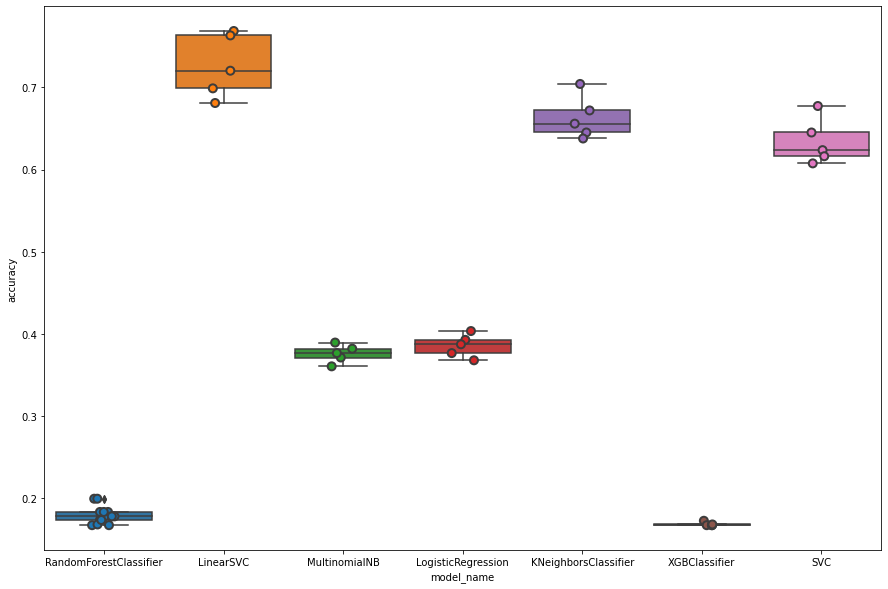

In [251]:

import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


# 各種分類器準確度

In [252]:
cv_df.groupby('model_name').accuracy.mean()


model_name
KNeighborsClassifier      0.663051
LinearSVC                 0.726539
LogisticRegression        0.385341
MultinomialNB             0.375687
RandomForestClassifier    0.178679
SVC                       0.633996
XGBClassifier             0.167922
Name: accuracy, dtype: float64

In [253]:
clf.fit(X_train_tfidf, y_train)


KNeighborsClassifier()

In [254]:
zzz1=pd.read_csv('test_ml.csv')
zzz=zzz1['0']


# 預測test

In [255]:
def myPredict(sec):
    format_sec=" ".join([w for w in list(jb.cut(remove_punctuation(sec))) if w not in stopwords])
    pred_cat_id=clf.predict(count_vect.transform([format_sec]))
    return id_to_cat[pred_cat_id[0]]


In [256]:
zxc=[]
for i in range(len(zzz)):
    zxc.append(myPredict(zzz[i]))

# 輸出

In [258]:
#讀取之前分數最高，分類器的結果，比較不同數值欄位資料(目前0.65   代表    若訓練有(350以上||200)比不一樣代表失真)
vvv=pd.read_csv('ccc.csv')
vvv=vvv['label']

In [259]:
len(vvv)

822

In [260]:
c=0
for i in range(len(zxc)):
    if(vvv[i]-zxc[i]!=0):
        c=c+1

In [261]:
c

287